In [10]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
file_path = "/content/drive/MyDrive/atividade3_dataset.csv"
import pandas as pd
df = pd.read_csv(file_path, sep=";")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [ ]:
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

**1. Leitura e inspeção**


In [11]:
import pandas as pd
df.info()

print(df.isnull().sum())

print("Duplicados:", df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           510 non-null    int64  
 1   Nome         510 non-null    object 
 2   Idade        489 non-null    float64
 3   Cidade       510 non-null    object 
 4   Produto      510 non-null    object 
 5   Preço        473 non-null    object 
 6   Quantidade   510 non-null    int64  
 7   Data_Compra  510 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 32.0+ KB
ID              0
Nome            0
Idade          21
Cidade          0
Produto         0
Preço          37
Quantidade      0
Data_Compra     0
dtype: int64
Duplicados: 8


**2. Tratamento de valores ausentes:**



Idade: Preencher com mediana. Remover linhas poderia causaria perca de dados importantes.

In [23]:
idade_mediana = df['Idade'].median()
df['Idade'].fillna(idade_mediana, inplace=True)
print(f"Idade nula preenchida com mediana: {idade_mediana}")


Idade ausente preenchida com mediana: 44.0


/tmp/ipython-input-1009141209.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Idade'].fillna(idade_mediana, inplace=True)


Cidade: Preencher com moda. A moda representa a cidade mais comum

In [28]:
cidade_moda = df['Cidade'].mode()[0]
df['Cidade'].fillna(cidade_moda, inplace=True)
print(f"Cidade nula preenchida com moda: {cidade_moda}")


Cidade nula preenchida com moda: PORTO ALEGRE


/tmp/ipython-input-1032869182.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cidade'].fillna(cidade_moda, inplace=True)


Preço: Preencher com mediana. Mantém a distribuição natural dos preços por tipo de produto



In [27]:
preco_por_produto = df.groupby('Produto')['Preço'].transform('median')
df['Preço'] = df['Preço'].fillna(preco_por_produto)
print("Preços nulos preenchidos com mediana")

Preços nulos preenchidos com mediana


**3. Detecção e remoção de duplicados**


In [30]:
duplicados = df.duplicated().sum()
print(f"Linhas duplicadas: {duplicados}")

Linhas duplicadas: 9


In [33]:
df = df.drop_duplicates()
duplicados_restantes = df.duplicated().sum()
print(f"Duplicados restantes: {duplicados_restantes}")

Duplicados restantes: 0


**4. Correções adicionais**

In [41]:
df['Cidade'] = df['Cidade'].str.upper().str.strip()
print("Cidades após padronização:")
print(df['Cidade'].value_counts())

Cidades após padronização:
Cidade
PORTO ALEGRE      76
SALVADOR          67
BELO HORIZONTE    65
CURITIBA          62
MANAUS            61
RIO DE JANEIRO    61
FORTALEZA         60
SÃO PAULO         49
Name: count, dtype: int64


In [53]:
df['Idade'] = df['Idade'].astype(int)
print(f"Idades convertidas: {df['Idade'].iloc[0]} (tipo: {df['Idade'].dtype})")

df['Quantidade'] = df['Quantidade'].astype(int)
print(f"Quantidades conertidas: {df['Quantidade'].iloc[0]} (tipo: {df['Quantidade'].dtype})")

df['ID'] = df['ID'].astype(int)
print(f"ID convertido: {df['ID'].iloc[0]} (tipo: {df['ID'].dtype})")


Idades convertidas: 48 (tipo: int64)
Quantidades conertidas: 7 (tipo: int64)
ID convertido: 1 (tipo: int64)


**5. Exploração inicial após limpeza**

In [55]:
print(f"Idade:")
print(f"  Média: {df['Idade'].mean():.1f} anos")
print(f"  Mediana: {df['Idade'].median():.1f} anos")
print(f"  Desvio Padrão: {df['Idade'].std():.1f} anos")

print(f"\nPreço:")
print(f"  Média: R$ {df['Preço'].mean():.2f}")
print(f"  Mediana: R$ {df['Preço'].median():.2f}")
print(f"  Desvio Padrão: R$ {df['Preço'].std():.2f}")

print(f"\nQuantidade:")
print(f"  Média: {df['Quantidade'].mean():.1f}")
print(f"  Mediana: {df['Quantidade'].median():.1f}")
print(f"  Desvio Padrão: {df['Quantidade'].std():.1f}")

Idade:
  Média: 44.3 anos
  Mediana: 44.0 anos
  Desvio Padrão: 15.0 anos

Preço:
  Média: R$ 3097.72
  Mediana: R$ 2802.13
  Desvio Padrão: R$ 3658.34

Quantidade:
  Média: 5.8
  Mediana: 6.0
  Desvio Padrão: 2.9


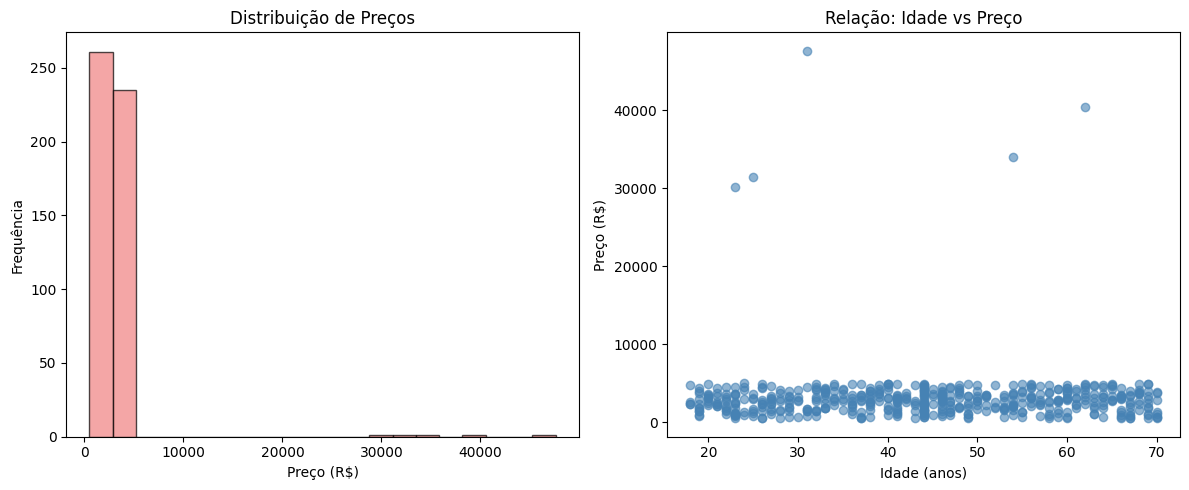

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Preço'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Distribuição de Preços')
plt.xlabel('Preço (R$)')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.scatter(df['Idade'], df['Preço'], alpha=0.6, color='steelblue')
plt.title('Relação: Idade vs Preço')
plt.xlabel('Idade (anos)')
plt.ylabel('Preço (R$)')

plt.tight_layout()
plt.show()